[Pasta no Drive com o dataset e notebook para usar no colab](https://drive.google.com/open?id=1N18_SPZcLgox9JhQpTIWIeI_L0o4_WqJ)

# Montando o Drive no colab e baixando o dataset

In [100]:
# Para ser executada caso usando no colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
PATH = '/content/drive/My Drive/h2o/'

# Instalando e iniciando H2O

In [102]:
!pip install h2o

In [ ]:
import h2o
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn-darkgrid')

In [5]:
h2o.init()
# h2o.cluster().shutdown()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.4" 2019-07-16; OpenJDK Runtime Environment (build 11.0.4+11-post-Ubuntu-1ubuntu218.04.3); OpenJDK 64-Bit Server VM (build 11.0.4+11-post-Ubuntu-1ubuntu218.04.3, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpda6a3ezy
  JVM stdout: /tmp/tmpda6a3ezy/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpda6a3ezy/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.5
H2O cluster version age:,8 days
H2O cluster name:,H2O_from_python_unknownUser_49riv7
H2O cluster total nodes:,1
H2O cluster free memory:,3 Gb
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster status:,"accepting new members, healthy"


# Importando e preparando dados

[Funções utilitárias para usar com o H2O](https://gist.github.com/regispires/9ff805492fb2ad129b015c1ad015a36c)

In [115]:
data = h2o.import_file(PATH + 'data.csv')
data = data.head(100000)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [116]:
data.as_data_frame().head(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare-bin,color,abs_lat_diff,abs_lon_diff,manhattan,euclidean,haversine,year_pickup,month_pickup,day_pickup,hour_pickup
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,"(0.0, 5.0]","(0.6509803921568628, 0.807843137254902, 0.8901960784313725)",0.009041,0.002701,0.011742,0.009436,15092.034032,2009,6,15,17
1,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,"(5.0, 10.0]","(0.12156862745098039, 0.47058823529411764, 0.7058823529411765)",0.010708,0.008504,0.019212,0.013674,15098.497877,2011,8,18,0
2,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,"(5.0, 10.0]","(0.12156862745098039, 0.47058823529411764, 0.7058823529411765)",0.024949,0.004437,0.029386,0.025340,15098.557034,2012,4,21,4
3,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,"(5.0, 10.0]","(0.12156862745098039, 0.47058823529411764, 0.7058823529411765)",0.015754,0.011440,0.027194,0.019470,15102.393629,2010,3,9,7
4,7.5,2012-11-20 20:35:00+00:00,-73.980002,40.751662,-73.973802,40.764842,1,"(5.0, 10.0]","(0.12156862745098039, 0.47058823529411764, 0.7058823529411765)",0.013180,0.006200,0.019380,0.014565,15099.954549,2012,11,20,20


In [ ]:
y = 'fare_amount'
x = data.col_names
remove_cols = ['fare_amount', 'pickup_datetime', 'fare-bin']

for r in remove_cols:
    x.remove(r)

In [ ]:
train, test, valid = data.split_frame(ratios=[.7, .15])

In [119]:
test

fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare-bin,color,abs_lat_diff,abs_lon_diff,manhattan,euclidean,haversine,year_pickup,month_pickup,day_pickup,hour_pickup
5.3,2010-03-09 07:51:00+00:00,-73.9681,40.768,-73.9567,40.7838,1,"(5.0, 10.0]","(0.12156862745098039, 0.47058823529411764, 0.7058823529411765)",0.015754,0.01144,0.027194,0.0194695,15102.4,2010,3,9,7
8.9,2009-09-02 01:11:00+00:00,-73.9807,40.7339,-73.9915,40.7581,2,"(5.0, 10.0]","(0.12156862745098039, 0.47058823529411764, 0.7058823529411765)",0.024265,0.010882,0.035147,0.0265934,15098.4,2009,9,2,1
5.5,2014-02-19 16:03:00+00:00,-73.9761,40.7524,-73.9811,40.7593,1,"(5.0, 10.0]","(0.12156862745098039, 0.47058823529411764, 0.7058823529411765)",0.006863,0.005007,0.01187,0.00849534,15099.1,2014,2,19,16
18.1,2011-09-07 23:05:44+00:00,-73.9937,40.7408,-73.9993,40.6766,1,"(15.0, 20.0]","(0.6980392156862745, 0.8745098039215686, 0.5411764705882353)",0.064168,0.005555,0.069723,0.064408,15090.4,2011,9,7,23
5.3,2011-03-04 18:12:00+00:00,-73.997,40.7371,-73.9861,40.735,1,"(5.0, 10.0]","(0.12156862745098039, 0.47058823529411764, 0.7058823529411765)",0.002052,0.010909,0.012961,0.0111003,15096.7,2011,3,4,18
4.5,2011-06-01 20:30:00+00:00,-73.9808,40.7444,-73.9911,40.7488,1,"(0.0, 5.0]","(0.6509803921568628, 0.807843137254902, 0.8901960784313725)",0.004377,0.010271,0.014648,0.0111647,15097.8,2011,6,1,20
9.7,2011-12-06 09:09:21+00:00,-73.9856,40.7398,-73.9739,40.7604,1,"(5.0, 10.0]","(0.12156862745098039, 0.47058823529411764, 0.7058823529411765)",0.020661,0.011683,0.032344,0.0237354,15099.3,2011,12,6,9
7.5,2013-09-07 03:17:00+00:00,-73.9777,40.7462,-73.9758,40.7451,1,"(5.0, 10.0]","(0.12156862745098039, 0.47058823529411764, 0.7058823529411765)",0.001157,0.001926,0.003083,0.0022468,15097.6,2013,9,7,3
15.3,2012-01-04 18:07:29+00:00,-73.9715,40.7559,-73.9681,40.8012,1,"(15.0, 20.0]","(0.6980392156862745, 0.8745098039215686, 0.5411764705882353)",0.045287,0.003443,0.04873,0.0454177,15103.7,2012,1,4,18
5,2015-05-12 23:51:42+00:00,-73.9548,40.7793,-73.9449,40.7801,1,"(0.0, 5.0]","(0.6509803921568628, 0.807843137254902, 0.8901960784313725)",0.000751495,0.00986481,0.0106163,0.00989339,15102.2,2015,5,12,23


# Modelos H2O

## [Random Forest](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/drf.html)

In [ ]:
from h2o.estimators.random_forest import H2ORandomForestEstimator

In [121]:
rf = H2ORandomForestEstimator(seed=1)
rf.train(x=x, y=y, training_frame=train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [122]:
rf.summary()


Model Summary: 

,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,10850719.0,20.0,20.0,20.0,14702.0,19663.0,17287.64


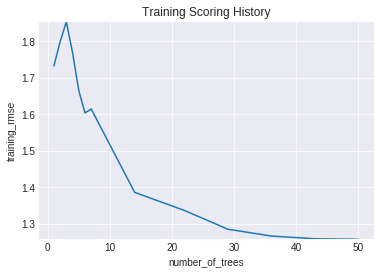

In [123]:
rf.plot()

In [124]:
rf.model_performance(test)


ModelMetricsRegression: drf
** Reported on test data. **

MSE: 1.5644295622046063
RMSE: 1.2507715867434015
MAE: 0.8334699894227148
RMSLE: 0.10382069612048572
Mean Residual Deviance: 1.5644295622046063


In [125]:
rf_2 = H2ORandomForestEstimator(ntrees=100, max_depth=40, seed=1)
rf_2.train(x=x, y=y, training_frame=train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [126]:
rf_2.summary()


Model Summary: 

,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,100.0,100.0,38180317.0,35.0,40.0,38.96,29983.0,31030.0,30404.94


In [127]:
rf_2.model_performance(test)


ModelMetricsRegression: drf
** Reported on test data. **

MSE: 1.5364607193549857
RMSE: 1.239540527516138
MAE: 0.8296137372227109
RMSLE: 0.10310952129589715
Mean Residual Deviance: 1.5364607193549857


## [Gradient Boosting Machine](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/gbm.html)

In [ ]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator

In [129]:
gbm = H2OGradientBoostingEstimator(seed=1)
gbm.train(x=x, y=y, training_frame=train)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [130]:
gbm.summary()


Model Summary: 

,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,21116.0,5.0,5.0,5.0,23.0,32.0,28.88


In [131]:
gbm.model_performance(test)


ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 1.5043763010502744
RMSE: 1.226530187582138
MAE: 0.8656745763358688
RMSLE: 0.10484550744721978
Mean Residual Deviance: 1.5043763010502744


In [ ]:
gbm_2 = H2OGradientBoostingEstimator(ntrees=1000, stopping_rounds=2, stopping_metric='RMSE', seed=1)

In [139]:
gbm_2.train(x=x, y=y, training_frame=train, validation_frame=valid)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [140]:
gbm_2.summary()


Model Summary: 

,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,385.0,385.0,139351.0,5.0,5.0,5.0,6.0,32.0,24.023376


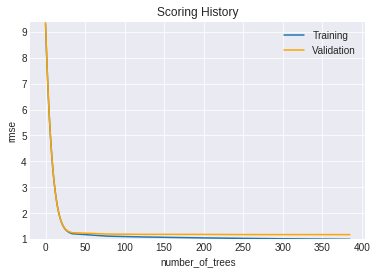

In [141]:
gbm_2.plot()

## [Stacked Ensemble](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/stacked-ensembles.html)

In [ ]:
from h2o.estimators.stackedensemble import H2OStackedEnsembleEstimator

In [ ]:
n_folds = 3

In [144]:
my_rf = H2ORandomForestEstimator(nfolds=n_folds,
                                 keep_cross_validation_predictions=True,
                                 seed=1)
my_rf.train(x=x, y=y, training_frame=train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [145]:
my_gbm = H2OGradientBoostingEstimator(nfolds=n_folds,
                                      keep_cross_validation_predictions=True,
                                      seed=1)
my_gbm.train(x=x, y=y, training_frame=train)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [146]:
ensemble = H2OStackedEnsembleEstimator(base_models=[my_rf, my_gbm])
ensemble.train(x=x, y=y, training_frame=train)

stackedensemble Model Build progress: |███████████████████████████████████| 100%


In [147]:
ensemble.model_performance(test)


ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 1.4673695707638017
RMSE: 1.211350308855288
MAE: 0.8369592049023243
RMSLE: 0.10246240643111541
R^2: 0.9823163735782641
Mean Residual Deviance: 1.4673695707638017
Null degrees of freedom: 15068
Residual degrees of freedom: 15066
Null deviance: 1250564.529047905
Residual deviance: 22111.79206183973
AIC: 48550.4998933193


# H2O AutoML

In [ ]:
from h2o.automl import H2OAutoML

In [149]:
aml = H2OAutoML(nfolds=3, max_runtime_secs=300, seed=1)
aml.train(x=x, y=y, training_frame=train.head(10000), validation_frame=valid.head(2000), leaderboard_frame=valid)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [ ]:
leaderboard = aml.leaderboard.as_data_frame()

In [151]:
leaderboard.head()

,model_id,mean_residual_deviance,rmse,mse,mae,rmsle
0,StackedEnsemble_AllModels_AutoML_20190925_142654,1.509473,1.228606,1.509473,0.848056,0.104091
1,GBM_1_AutoML_20190925_142654,1.533986,1.238542,1.533986,0.854980,0.105153
2,StackedEnsemble_BestOfFamily_AutoML_20190925_142654,1.538965,1.240550,1.538965,0.854288,0.105120
3,GBM_4_AutoML_20190925_142654,1.575671,1.255257,1.575671,0.858312,0.105254
4,GBM_3_AutoML_20190925_142654,1.699548,1.303667,1.699548,0.872552,0.107516


In [ ]:
def h2o_not_default_params_df(leaderboard, id_num):
    model_id = leaderboard.loc[id_num, 'model_id']
    model = h2o.get_model(model_id)
    params = model.get_params()
    result = []
    ignore_params = ['model_id', 'training_frame', 'validation_frame', 'response_column', 'ignored_columns']
    for k in params:
        if k not in ignore_params and params[k]['default_value'] != params[k]['actual_value']:
            result.append({ 'param': k, 'default_value': params[k]['default_value'], 
                            'actual_value': params[k]['actual_value']})
    df_ = pd.DataFrame(result)
    cols = ['param', 'default_value', 'actual_value']
    return df_[ cols ]

In [154]:
h2o_not_default_params_df(leaderboard, 1)

,param,default_value,actual_value
0,nfolds,0,3
1,keep_cross_validation_models,True,False
2,keep_cross_validation_predictions,False,True
3,score_tree_interval,0,5
4,fold_assignment,AUTO,Modulo
5,ntrees,50,73
6,max_depth,5,6
7,min_rows,10,1
8,stopping_metric,AUTO,deviance
9,stopping_tolerance,0.001,0.01


Produzido por: Matheus Xavier Sampaio